# Biopython - Estudando conceitos basicos da biblioteca


## 1 - Preparando a biblioteca

Primeiro é preciso instalar a biblioteca Biopython rodando o comando abaixo:

In [37]:
!pip install biopython

## 2 - Trabalhando com sequencias - Basico

Para trabalharmos com sequencias devemos primeiro importa-las

In [38]:
#Do modulo Bio.Seq, importamos a classe Seq
from Bio.Seq import Seq

### 2.1 - Importando uma sequência


In [39]:
#Declarando a sequencia de interesse
DNA = Seq("ATGCATGCATGC")
DNA

Seq('ATGCATGCATGC')

### 2.2 - Sequência complementar e complementar reversa



In [40]:
#COMPLEMENTAR
DNA_complementar = DNA.complement()
DNA_complementar #Repare que o sentido aqui é é 3'-5'

Seq('TACGTACGTACG')

In [41]:
#COMPLEMENTAR REVERSA
DNA_complementar_reversa = DNA.reverse_complement()
DNA_complementar_reversa #Repare que o sentido aqui é 5'-3'

Seq('GCATGCATGCAT')

In [42]:
#Comparando as Três sequencias:
print("DNA = ", DNA)
print("DNA_complementar = ", DNA_complementar)
print("DNA complementar reverso = ", DNA_complementar_reversa)

DNA =  ATGCATGCATGC
DNA_complementar =  TACGTACGTACG
DNA complementar reverso =  GCATGCATGCAT


### 2.3 - Sequência complementar de um RNA

In [43]:
#Importando um RNA
RNA = Seq("AUGCAUGCAUGC")
print("RNA = ",RNA)
#Complementar do RNA
RNA_complementar = RNA.complement_rna()
print("RNA complementar", RNA_complementar)


RNA =  AUGCAUGCAUGC
RNA complementar UACGUACGUACG


## 3 - Transcrição de sequência

In [44]:
#O método transcribe apenas transforma Timinas em Uracilas
#Ou seja, este metodo tras a fita CODIFICADORA
transcrito = DNA.transcribe()
print(DNA)
print(transcrito)

ATGCATGCATGC
AUGCAUGCAUGC


In [45]:
#Pode-se tambem fazer o caminho contrário. Do transcrito para o DNA
transcrito.back_transcribe()

Seq('ATGCATGCATGC')

In [46]:
#Se quisermos a fita MOLDE da sequencia de RNA podemos fazer:
transcrito.back_transcribe().reverse_complement()


Seq('GCATGCATGCAT')

## 4 - Tradução da sequência

Aqui opteremos a sequência de aminoácidos (Abreviação com uma letra)

### 4.1 - A partir de RNA Mensageiro

In [47]:
#A tradução deve ser feita a partir de uma fita de RNA mensageiro
#importando RNA
RNA2 = Seq("AUACGUAUUGGAUUUAUA")

#Obter proteína e salvar em variável
proteina_RNA = RNA2.translate()
proteina_RNA

Seq('IRIGFI')

In [48]:
#Este método reconhece o StopCodon.
#Vamos adicionar o stop "UGA" para que veja oque ocorre.
#Coloca * no stop codon
RNA2_stop = Seq("AUACGUAUUGGAUUUAUAUGA")

#Traduzindo
proteina_RNA2 = RNA2_stop.translate()
proteina_RNA2

Seq('IRIGFI*')

In [49]:
#Se o STOP estiver no meio da sequência:

rna_stop2 = Seq("AUACGUAUUUGAGGAUUUAUA")

#Parando no STOP
proteina2 = rna_stop2.translate(to_stop=True) 
print(proteina2)

#Seguindo após STOP (to_stop = False é padrão)
proteina2 = rna_stop2.translate()  
print(proteina2)

IRI
IRI*GFI


### 4.2 - A partir de DNA

In [50]:
proteina_DNA = DNA.translate()
proteina_DNA

Seq('MHAC')

## 5 - Métodos para trabalhar com objetos da classe Seq

### 5.1 - find()

Busca um trecho de sequência

In [51]:
from Bio.Seq import Seq

#Declarando sequencia da classe Seq
meu_dna = Seq("AATGGCTTCGGA")

#Passando o trecho procurado
meu_dna.find("GGC")
#Retorna o numero (indice) da primeira posição
#Lembre que em python começa no 0

3

In [52]:
#Se passarmos um trecho que não existe, o programa retornará "-1"
meu_dna.find("AAA")

-1

### 5.2 - index()

Semelhante ao find(). Contudo, retorna um erro se não encontrar a sequência

In [53]:
meu_dna.index("GGC")

3

In [54]:
meu_dna.index("AAA")

ValueError: substring not found

### 5.3 - count()

Conta a quantidade de uma base na sequência

In [ ]:
#Contando quantia de bases
print(meu_dna.count("A"))
print(meu_dna.count("C"))
print("\n")

#CUIDADO COM OVVERLAPS
#Metodo específico para contar com overlaps
minha_sobreposicao = Seq("AAAATCGTA")
print(minha_sobreposicao.count("AA"))
print(minha_sobreposicao.count_overlap("AA"))

### 5.4 - startswith()

True - Se a sequencia iniciar com o trecho dado
ou
False - Caso contrário

In [ ]:
print(meu_dna)

print(meu_dna.startswith("AAT"))
print(meu_dna.startswith("ATG"))

### 5.5 - endsswith()

True - Se a sequencia termina com o trecho dado
ou
False - Caso contrário

In [ ]:
print(meu_dna)

print(meu_dna.endswith("CGGA"))
print(meu_dna.endswith("CGGU"))

### 5.6 - split()

Retorna uma lista de strings (Como objetos de Seq) usando sep como delimitador

In [ ]:
#Vamos pegar um RNA, traduzilo em proteina e depois usar como delimitador os stop codons ( * )
rna = Seq("AUUGGUACGUAAGGCAGCGUGUGAUAUCCGGGG")

proteina = rna.translate()
proteina

In [ ]:
#Quebrando nossa sequencia de aminoácidos usando os stop codons como delimitadores
proteina.split(sep="*")
#O método devolve uma lista com os trechos como objetos Seq

### 5.7 - strip()

Remove os espaços de começo e final da sequencia

In [ ]:
#Declarando sequencia com espaço em branco no começo e final
meu_dna = Seq(' AATGGCTTCGGA ')
meu_dna.strip(chars=' ')

In [ ]:
#Declarando sequencia com '-' no começo e final
meu_dna = Seq('-AATGGCTTCGGA-')
meu_dna.strip(chars='-')

### 5.8 - join()

Intercala uma lista de strings com um intercalador

In [ ]:
intercalador = Seq("AAA")

# criamos uma lista com trechos
lista = ["GGGG", "TTTT", "CCCC"]

# o método .join() irá juntar os trechos, usando o intercalador entre eles
intercalador.join(lista)

### 5.9 - upper()

Retorna as letras em maiúsculo

In [ ]:
sequencia = Seq("aaAAaTttGGgggcccccCC")
sequencia.upper()

### 5.10 - lower()

Retorna as letras em minúsculo

In [ ]:
sequencia = Seq("aaAAaTttGGgggcccccCC")
sequencia.lower()

## 6 - Concatenando Sequências

para unir sequências, podemos usar o operador "+" que, quando aplicado a strings, faz a concatenação:


In [ ]:
# vamos criar quatro sequências
seq1 = Seq("AAAA")
seq2 = Seq("CCCC")
seq3 = Seq("GGGG")
seq4 = Seq("TTTT")

# concatenando as quatro sequências e salvando numa variável
sequencia_concatenada = seq1 + seq2 + seq3 + seq4
sequencia_concatenada

## 7 - Comparando sequências

para comparar sequências, podemos usar o operador "==":

In [ ]:
# vamos criar três sequências
seq1 = Seq("AAAACCCC")
seq2 = Seq("GGGGCCCC")
seq3 = Seq("AAAACCCC")

# comparando seq1 com seq2
if seq1 == seq2:
  print("1 e 2 São iguais")
  print("\n")
else:
  print("1 e 2 Não são iguais")
  print("\n")

# comparando seq1 com seq3
if seq1 == seq3:
  print("1 e 3 São iguais")
  print("\n")
else:
  print("1 e 3 Não são iguais")
  print("\n")

## 8 - Verificando se uma sequencia contém um trecho específico

para verificar se um trecho de nucleotídeos está presente em uma sequência, usamos "in"

-->(pode parecer semelhante ao .find(), porém o "in" retorna um valor booleano True ou False, enquanto .find() retorna um índice)

In [ ]:
# trecho de interesse
trecho = Seq("AATT")

# sequência que queremos buscar o trecho
sequencia = Seq("ATCGATGCTGACAATTGTCGATCGAAT")

trecho in sequencia

In [ ]:
# podemos também imprimir uma mensagem 
if trecho in sequencia:
  print("A sequência possui esse trecho")
else:
  print("Esse trecho não está presente na sequência")

# Trabalhando com gráficos

Neste caso utilizaremos as bibliotecas MatplotLib e Seaborn

## Importando as bibliotecas

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

## Definindo sequencia de interesse

In [56]:
# essa será nossa sequência
meu_dna = "CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGACTGGGAACCTGCGGGCAGTAGGTGGAAT"

# vamos garantir que todas as letras estejam em maiúsculo para evitar possíveis erros 
meu_dna = meu_dna.upper()

## Quantidade de Nucleotídeos



In [57]:
# função que retorna a quantidade de A T G C da sequência:
def conta_nucleotideos(dna): 
  nucleotideos = [dna.count("A"), dna.count("T"), dna.count("G"), dna.count("C")]
  return nucleotideos

# chamando a função e guardando as quantidades na variável nucleotídeos
nucleotideos = conta_nucleotideos(meu_dna)
nucleotideos

[20, 14, 29, 24]

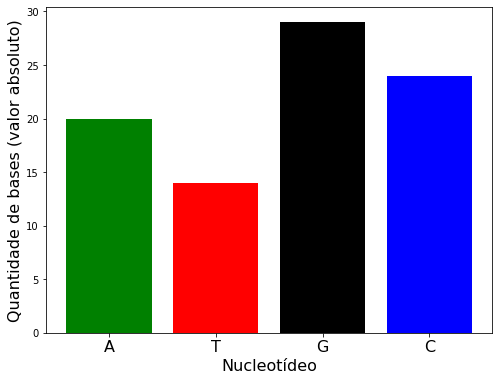

In [58]:
# função para criar o gráfico que recebe como parâmetros os nucleotídeos
def cria_grafico_nucleotideos(nucleotideos):

# valores do eixo x e suas cores
  nome_bases = ("A", "T", "G", "C")
  cores = ("green", "red", "black", "blue")

# plotando o gráfico e legendas
  plt.figure(figsize=(8,6))
  plt.bar(nome_bases, nucleotideos, color = cores)
  plt.ylabel("Quantidade de bases (valor absoluto)", fontsize = 16)
  plt.xticks(nome_bases, fontsize = 16)
  plt.xlabel("Nucleotídeo", fontsize = 16);

# chamamos a função
cria_grafico_nucleotideos(nucleotideos)

## Proporção de nucleotídeos

In [59]:
# função que retorna a proporção de A T G C da sequência:
def proporcao_nucleotideos(dna): 
# criamos uma lista vazia para guardar as proporções
  proporcao = []
# contamos a quantidade de cada base e depois somamos o valor total
  bases = [dna.count("A"), dna.count("T"), dna.count("G"), dna.count("C")]
  total = sum(bases)
# obtemos a proporção de cada base
  for base in bases:
    proporcao.append((base/total) * 100)
  return proporcao

# chamamos a função
proporcao = proporcao_nucleotideos(meu_dna)
proporcao

[22.988505747126435, 16.091954022988507, 33.33333333333333, 27.586206896551722]

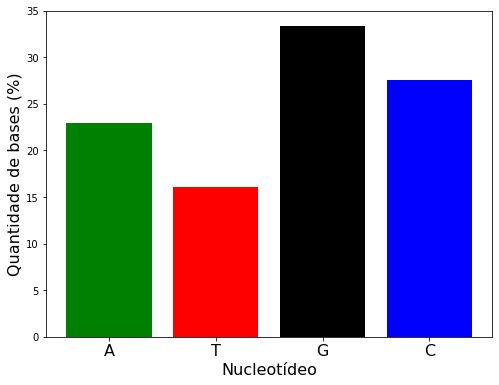

In [60]:
# função para criar o gráfico com as proporções de A, T, G, C:
def cria_grafico_proporcao_nucleotideos(proporcao):
  nome_bases = ("A", "T", "G", "C")
  cores = ("green", "red", "black", "blue")

  plt.figure(figsize=(8,6))
  plt.bar(nome_bases, proporcao, color=cores)
  plt.ylabel("Quantidade de bases (%)", fontsize = 16)
  plt.xticks(["A", "T", "G", "C"], fontsize = 16)
  plt.xlabel("Nucleotídeo", fontsize = 16);


cria_grafico_proporcao_nucleotideos(proporcao)

## Conteúdo GC

In [61]:
# função que retorna a proporção de GC da sequência:
def proporcao_gc(dna): 
# contar e somar G e C
  bases_gc = dna.count("G") + dna.count("C")
# tamanho total da sequência
  total = len(dna)
# obtendo a propoção de GC
  proporcao = (bases_gc / total) * 100
  return proporcao

# chamando a função
gc = proporcao_gc(meu_dna)
gc

60.91954022988506

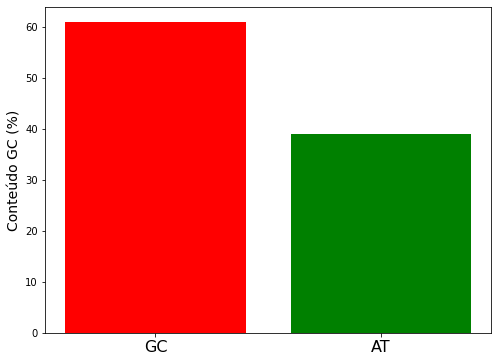

In [62]:
# função para criar o gráfico com o conteúdo GC x AT:
def cria_grafico_conteudo_gc(gc):
  eixo_x = ("GC", "AT")
  cores = ("red", "green")
  at = 100 - gc
  eixo_y = [gc, at]

  plt.figure(figsize=(8,6))
  plt.bar(eixo_x, eixo_y, color = cores)
  plt.xticks(["GC", "AT"], fontsize = 16)
  plt.ylabel("Conteúdo GC (%)", fontsize = 14)

cria_grafico_conteudo_gc(gc)

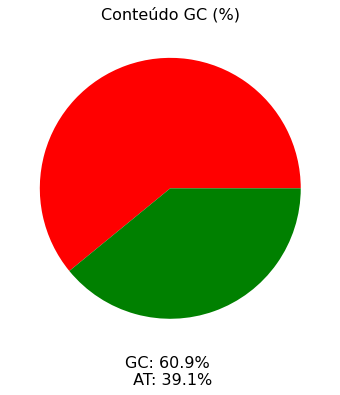

In [63]:
# função para criar um gráfico em pizza com o conteúdo GC x AT:
def cria_grafico_pizza_conteudo_gc(gc):
  cores = ("red", "green")
  at = 100 - gc
  dados = [gc, at]

  plt.figure(figsize=(8,6))
  plt.pie(dados, colors = cores)
  plt.title("Conteúdo GC (%)", fontsize = 16)
  plt.xlabel("GC: {:.1f}% \n AT: {:.1f}%".format(gc, at), fontsize = 16)

cria_grafico_pizza_conteudo_gc(gc)